# Exam exercise!

## Exoplanets

[Exoplanets](https://en.wikipedia.org/wiki/Exoplanet) are planets outside of the solar system. The existence of exoplanets was first confirmed in 1992. Since then the number of detected exoplanets exploded, and right now there are more than 5000! Some as are light as our Moon, and some are as heavy as 30 times the mass of Jupyter!

NASA hosts a public database with all the exoplanets discovered:

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS&constraint=default_flag%20%3E0

These planets orbit far away stars. This plots shows the 2d distributions of the size of the orbit (x axis) and the mass of the planet (y axis).

![](https://elt.eso.org/public/archives/images/screen/exoplanets_elt_large.jpg)

As you see, this distribution is not uniform! There are well localized subpopulations of planets!

**Tasks**

You want to understand the pdf of exoplanets.
- Download the database and read it with python
- Starting from these two variables (orbital radius and planet mass), construct a 2d representation using all three method we've seen: a simple 2d histogram, a KDE, and a gaussian mixture model
- Explore the distribution of other parameters in the database.
- The database provides information on the various detection methods of exoplanets (radial velocity, direct imaging etc). Investigate if some subpopulations are preferentially detected with a given method. Google this thing a bit and try to understand why that's the case.
- The database also provide the year of discovery. Again with the help of google, try to correlate this with the lauch date of big satellites.

# Download the database and read it with python

In [29]:
import pandas as pd

file_path = '/content/PS_2024.05.09_00.49.05.csv'

correct_skiprows = 48

# Skipping bad lines and warning about them
data = pd.read_csv(file_path, on_bad_lines='skip', skiprows=correct_skiprows)

print(data.head())  # Print the first few rows to inspect the data


   loc_rowid     pl_name  hostname  default_flag  sy_snum  sy_pnum  \
0          3    11 Com b    11 Com             1        2        1   
1          4    11 UMi b    11 UMi             1        1        1   
2          7    14 And b    14 And             1        1        1   
3         12    14 Her b    14 Her             1        1        2   
4         23  16 Cyg B b  16 Cyg B             1        3        1   

   discoverymethod  disc_year                           disc_facility  \
0  Radial Velocity       2007                        Xinglong Station   
1  Radial Velocity       2009  Thueringer Landessternwarte Tautenburg   
2  Radial Velocity       2008       Okayama Astrophysical Observatory   
3  Radial Velocity       2002                  W. M. Keck Observatory   
4  Radial Velocity       1996                  Multiple Observatories   

               soltype  ...          ra         decstr        dec   sy_dist  \
0  Published Confirmed  ...  185.178779  +17d47m35.71s  17.79

In [30]:
print(data.head(20))

    loc_rowid                       pl_name                   hostname  \
0           3                      11 Com b                     11 Com   
1           4                      11 UMi b                     11 UMi   
2           7                      14 And b                     14 And   
3          12                      14 Her b                     14 Her   
4          23                    16 Cyg B b                   16 Cyg B   
5          24                      17 Sco b                     17 Sco   
6          26                      18 Del b                     18 Del   
7          29       1RXS J160929.1-210524 b      1RXS J160929.1-210524   
8          32                      24 Boo b                     24 Boo   
9          34                      24 Sex b                     24 Sex   
10         35                      24 Sex c                     24 Sex   
11         36                      2M0437 b    2MASS J04372171+2651014   
12         37  2MASS J01033563-5515561

In [ ]:
print(data.columns)

**Starting from these two variables (orbital radius and planet mass), construct a 2d representation using all three method we've seen: a simple 2d histogram, a KDE, and a gaussian mixture model**

# Histogram of Exoplanet Discovery Years & KDE of Exoplanet Discovery Years

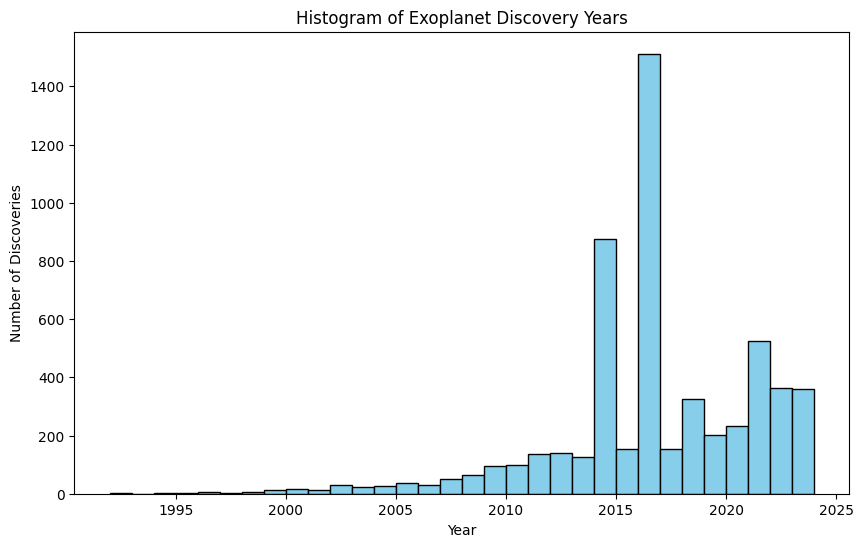

<ipython-input-32-cefa4deaff28>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['disc_year'], shade=True, color="r", alpha=0.5)


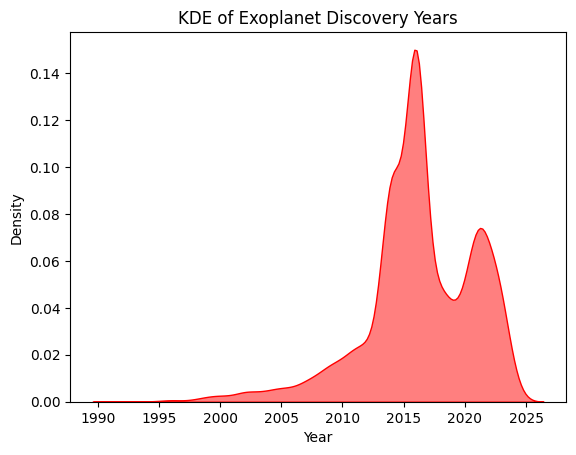

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of discovery years
plt.figure(figsize=(10, 6))
plt.hist(data['disc_year'], bins=range(int(data['disc_year'].min()), int(data['disc_year'].max()) + 1), color='skyblue', edgecolor='black')
plt.title('Histogram of Exoplanet Discovery Years')
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.show()

# KDE plot of discovery years
sns.kdeplot(data['disc_year'], shade=True, color="r", alpha=0.5)
plt.title('KDE of Exoplanet Discovery Years')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()


In [35]:
orbital_radius = 'pl_orbsmax'
planet_mass = 'pl_bmassj'

# Print a summary of these columns to check for missing data and datatype
print(data[[orbital_radius, planet_mass]].describe())


        pl_orbsmax    pl_bmassj
count  3409.000000  2576.000000
mean     10.114204     2.419853
std     167.101798     4.543314
min       0.004400     0.000060
25%       0.055900     0.045565
50%       0.118000     0.630000
75%       0.843000     2.310000
max    7506.000000    30.000000


In [39]:
# Check for and count missing values in relevant columns
print(data[[orbital_radius, planet_mass]].isna().sum())



pl_orbsmax    2207
pl_bmassj     3040
dtype: int64


In [40]:
# Drop rows where these key columns have missing values
data_cleaned = data.dropna(subset=[orbital_radius, planet_mass])

data_cleaned.loc[:, orbital_radius] = data_cleaned[orbital_radius].astype(float)
data_cleaned.loc[:, planet_mass] = data_cleaned[planet_mass].astype(float)

print(data_cleaned[[orbital_radius, planet_mass]].describe())


        pl_orbsmax    pl_bmassj
count  2259.000000  2259.000000
mean     15.141141     2.585548
std     205.096566     4.715125
min       0.004400     0.000060
25%       0.055400     0.050000
50%       0.217500     0.700000
75%       1.755000     2.530500
max    7506.000000    30.000000


# **Task 2: Construct a 2D representation using histograms, KDE, and Gaussian Mixture Model**

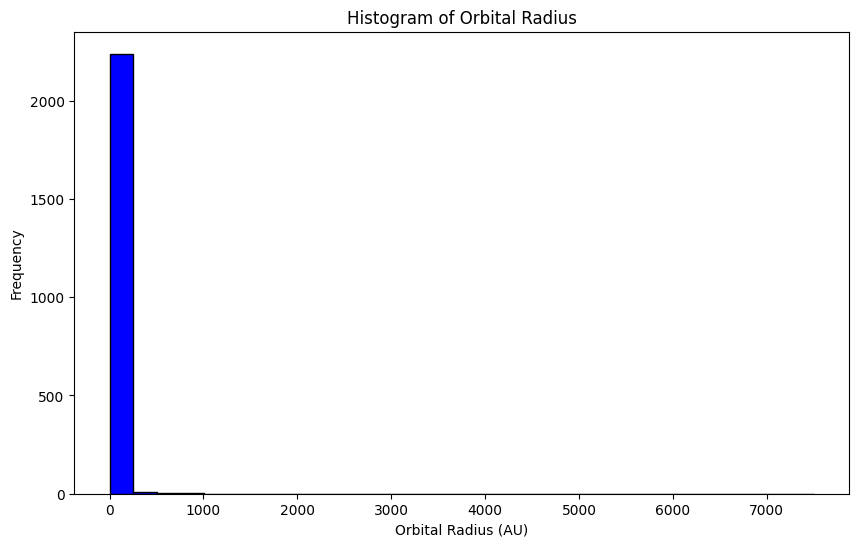

<ipython-input-41-ebad9eec5457>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_cleaned[planet_mass], shade=True, color="green")


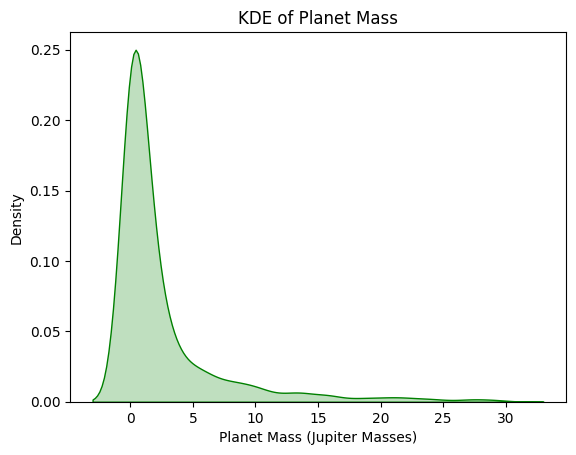

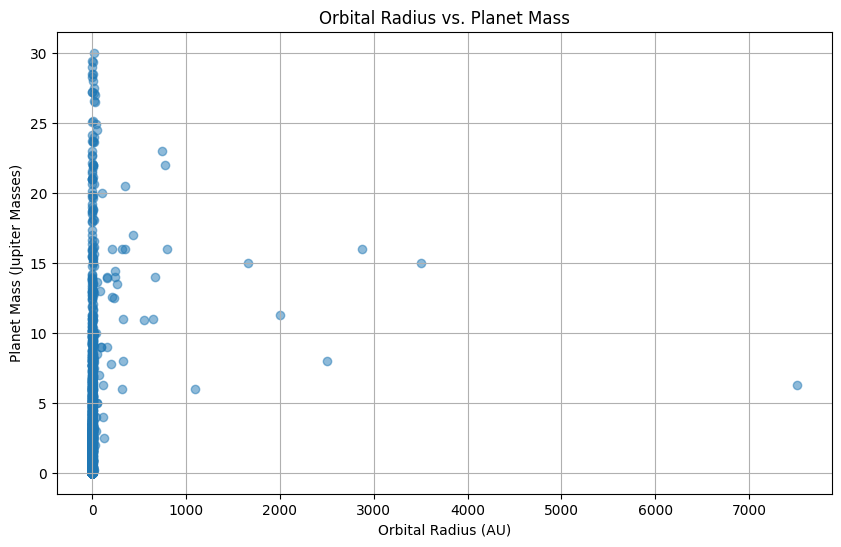

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the orbital radius
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned[orbital_radius], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Orbital Radius')
plt.xlabel('Orbital Radius (AU)')
plt.ylabel('Frequency')
plt.show()

# KDE plot for planet mass
sns.kdeplot(data_cleaned[planet_mass], shade=True, color="green")
plt.title('KDE of Planet Mass')
plt.xlabel('Planet Mass (Jupiter Masses)')
plt.ylabel('Density')
plt.show()

# Scatter plot to visualize the relationship between orbital radius and planet mass
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned[orbital_radius], data_cleaned[planet_mass], alpha=0.5)
plt.title('Orbital Radius vs. Planet Mass')
plt.xlabel('Orbital Radius (AU)')
plt.ylabel('Planet Mass (Jupiter Masses)')
plt.grid(True)
plt.show()


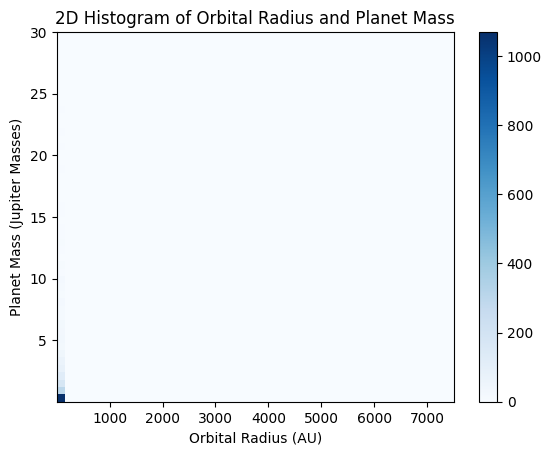

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
import numpy as np

# Using 'pl_orbsmax' for orbital radius and 'pl_bmassj' for planet mass
data_cleaned = data.dropna(subset=['pl_orbsmax', 'pl_bmassj'])

# Histogram
plt.hist2d(data_cleaned['pl_orbsmax'], data_cleaned['pl_bmassj'], bins=(50, 50), cmap='Blues')
plt.colorbar()
plt.xlabel('Orbital Radius (AU)')
plt.ylabel('Planet Mass (Jupiter Masses)')
plt.title('2D Histogram of Orbital Radius and Planet Mass')
plt.show()



# KDE Plot

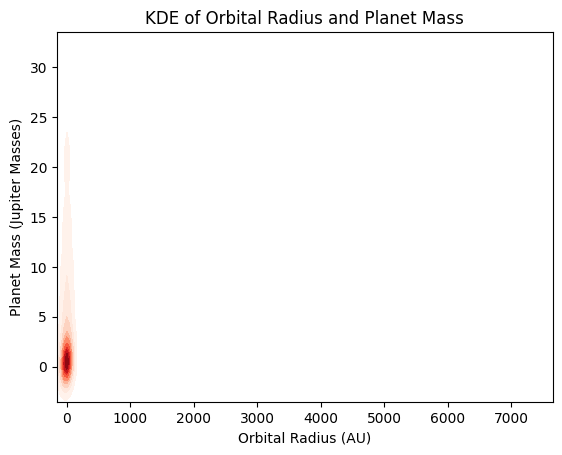

In [49]:
sns.kdeplot(x=data_cleaned['pl_orbsmax'], y=data_cleaned['pl_bmassj'], cmap="Reds", fill=True, bw_adjust=0.9)
plt.xlabel('Orbital Radius (AU)')
plt.ylabel('Planet Mass (Jupiter Masses)')
plt.title('KDE of Orbital Radius and Planet Mass')
plt.show()

# Gaussian Mixture Model


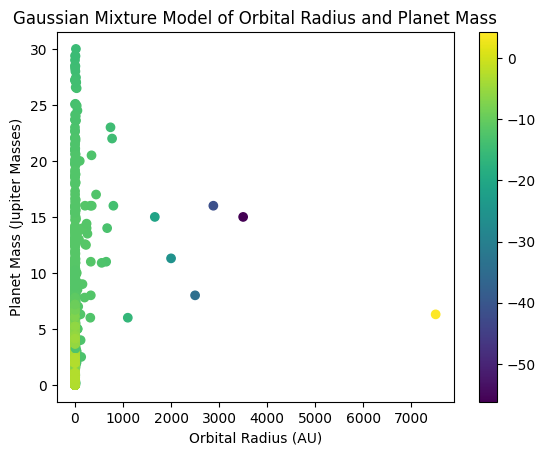

In [47]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Scatter plot of the data with labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['pl_orbsmax'], X['pl_bmassj'], c=labels, cmap='viridis', s=40, marker='o', alpha=0.5)

# Adding a color bar and titles
plt.colorbar(scatter, label='Cluster Label')
plt.title('Gaussian Mixture Model Clustering of Exoplanets')
plt.xlabel('Orbital Radius (AU)')
plt.ylabel('Planet Mass (Jupiter Masses)')
plt.grid(True)

# Optionally: Plotting density contours
# Generating a mesh grid to plot the density
x = np.linspace(X['pl_orbsmax'].min(), X['pl_orbsmax'].max(), 100)
y = np.linspace(X['pl_bmassj'].min(), X['pl_bmassj'].max(), 100)
X_mesh, Y_mesh = np.meshgrid(x, y)
XX = np.array([X_mesh.ravel(), Y_mesh.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X_mesh.shape)

# Density contours
plt.contour(X_mesh, Y_mesh, Z, levels=14, linewidths=1.2, colors='r', norm=LogNorm(vmax=1.0, vmin=Z.min()))
plt.show()


## Contour Plots visualization

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


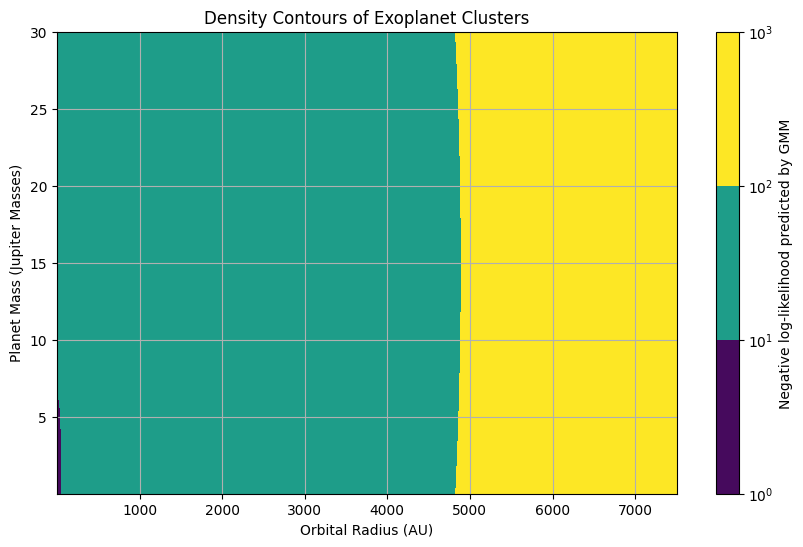

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

# Fitting the Gaussian Mixture Model
X = data_cleaned[['pl_orbsmax', 'pl_bmassj']]
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

# Generating a grid of points over the data range
x = np.linspace(X['pl_orbsmax'].min(), X['pl_orbsmax'].max(), 100)
y = np.linspace(X['pl_bmassj'].min(), X['pl_bmassj'].max(), 100)
X_mesh, Y_mesh = np.meshgrid(x, y)
XX = np.array([X_mesh.ravel(), Y_mesh.ravel()]).T

# Calculating the density of the GMM at these points
Z = -gmm.score_samples(XX)
Z = Z.reshape(X_mesh.shape)

# Adjust vmin and vmax based on Z's range
vmin = Z.min() if Z.min() > 0 else np.exp(np.min(Z[Z > 0]))
vmax = np.max(Z)

# Plotting the density contours
plt.figure(figsize=(10, 6))
contour = plt.contourf(X_mesh, Y_mesh, Z, levels=40, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(contour)
cbar.set_label('Negative log-likelihood predicted by GMM')
plt.title('Density Contours of Exoplanet Clusters')
plt.xlabel('Orbital Radius (AU)')
plt.ylabel('Planet Mass (Jupiter Masses)')
plt.grid(True)
plt.show()



**Explore the distribution of other parameters in the database.**

##Group data by discovery method and count occurrences

discoverymethod
Transit                          4171
Radial Velocity                  1089
Microlensing                      217
Imaging                            70
Transit Timing Variations          29
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          3
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: count, dtype: int64


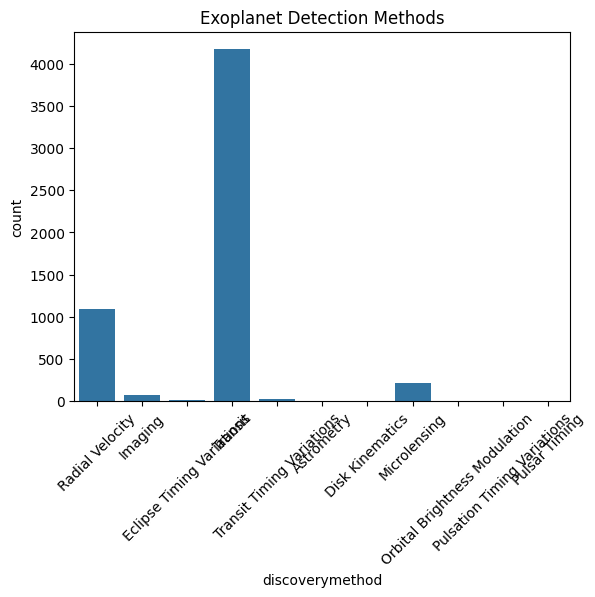

In [51]:
# Group data by discovery method and count occurrences
detection_methods = data['discoverymethod'].value_counts()
print(detection_methods)

# Plot
sns.countplot(x='discoverymethod', data=data)
plt.xticks(rotation=45)
plt.title('Exoplanet Detection Methods')
plt.show()


## Group data by year of discovery and count occurrences

disc_year
1992       2
1994       1
1995       1
1996       6
1997       1
1998       6
1999      13
2000      16
2001      12
2002      29
2003      22
2004      27
2005      36
2006      31
2007      52
2008      64
2009      94
2010      98
2011     136
2012     139
2013     127
2014     875
2015     155
2016    1512
2017     153
2018     324
2019     202
2020     233
2021     525
2022     365
2023     316
2024      43
Name: count, dtype: int64


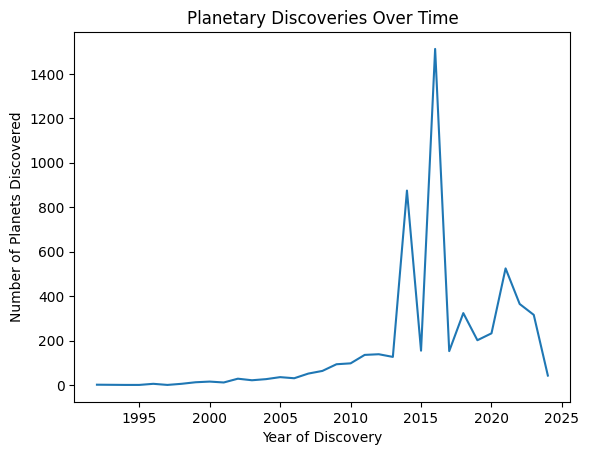

In [54]:
# Group data by year of discovery and count occurrences
discoveries_per_year = data['disc_year'].value_counts().sort_index()
print(discoveries_per_year)

# Plot
plt.plot(discoveries_per_year.index, discoveries_per_year.values)
plt.xlabel('Year of Discovery')
plt.ylabel('Number of Planets Discovered')
plt.title('Planetary Discoveries Over Time')
plt.show()

# Compare this timeline to the launch dates of major observatories.


## Statistical Analysis

In [88]:
import scipy.stats as stats

# ANOVA for orbital radius across different discovery methods
f_val_orb, p_val_orb = stats.f_oneway(*[group['pl_orbsmax'].values for name, group in data_cleaned.groupby('discoverymethod')])
print(f"ANOVA test for orbital radius: F-value = {f_val_orb}, P-value = {p_val_orb}")

# ANOVA for planet mass across different discovery methods
f_val_mass, p_val_mass = stats.f_oneway(*[group['pl_bmassj'].values for name, group in data_cleaned.groupby('discoverymethod')])
print(f"ANOVA test for planet mass: F-value = {f_val_mass}, P-value = {p_val_mass}")


ANOVA test for orbital radius: F-value = 40.43362627843473, P-value = 6.734696725021752e-74
ANOVA test for planet mass: F-value = 53.59148191979578, P-value = 3.951322724412756e-97



**Interpretation of ANOVA Results**

**Orbital Radius**

**F-value** = 40.4336: This value is relatively high, which suggests that there are substantial differences in the mean orbital radii of planets detected by various methods.

**P-value** ≈
6.73
×
1
0
−
74
6.73×10
−74
 : This extremely small p-value indicates that these differences are statistically significant. You can reject the null hypothesis that all groups have the same mean orbital radius.


**Planet Mass**

**F-value** = 53.5915: Even higher than the F-value for orbital radius, this indicates very strong differences in the mean planet masses detected by different methods.

**P-value** ≈
3.95
×
1
0
−
97
3.95×10
−97
 : Similarly, this exceedingly small p-value allows you to confidently reject the null hypothesis that the mean planet mass is the same across all discovery methods.

# Group data by detection method and summarize planet size and mass using a list

                              pl_radj                                      \
                                count      mean       std    min      25%   
discoverymethod                                                             
Astrometry                        0.0       NaN       NaN    NaN      NaN   
Disk Kinematics                   0.0       NaN       NaN    NaN      NaN   
Eclipse Timing Variations         0.0       NaN       NaN    NaN      NaN   
Imaging                          24.0  1.699167  1.225928  0.934  1.19250   
Microlensing                      0.0       NaN       NaN    NaN      NaN   
Orbital Brightness Modulation     3.0  0.501667  0.743352  0.068  0.07250   
Pulsar Timing                     0.0       NaN       NaN    NaN      NaN   
Pulsation Timing Variations       0.0       NaN       NaN    NaN      NaN   
Radial Velocity                  27.0  0.454185  0.409253  0.116  0.14600   
Transit                        4082.0  0.374301  0.399445  0.028  0.14225   

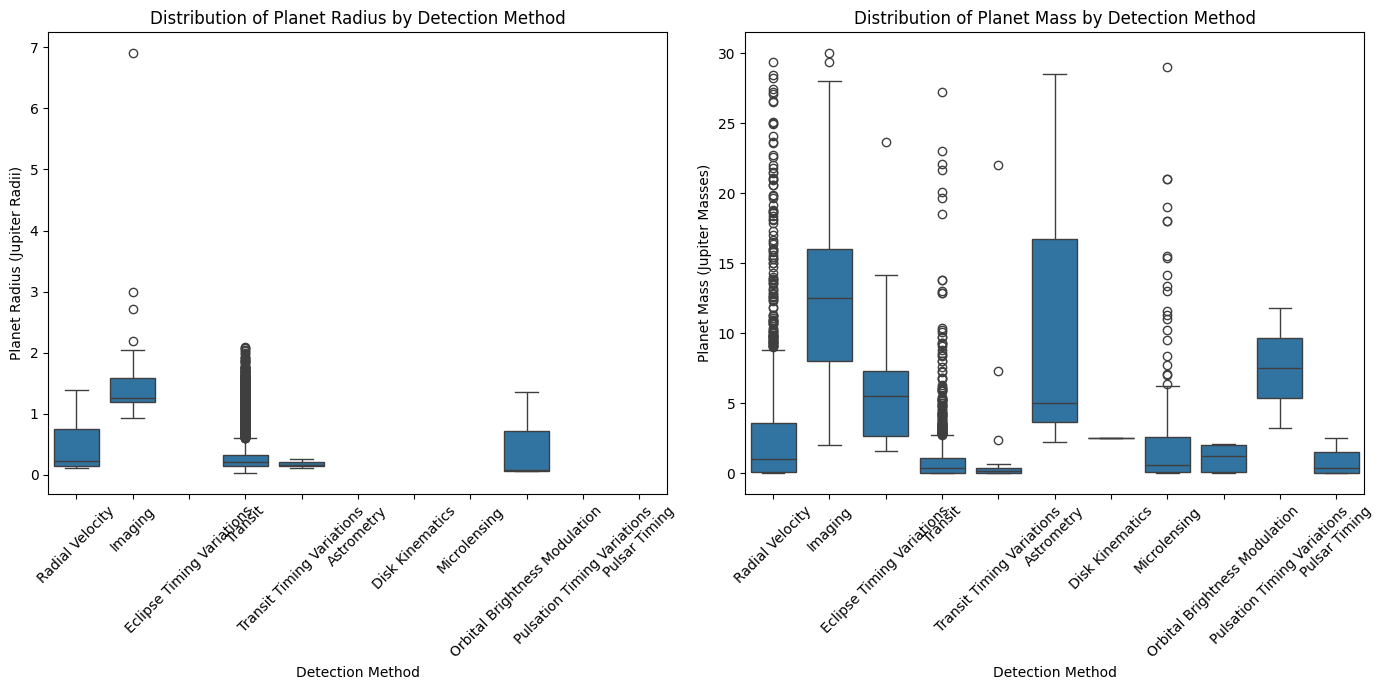

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by detection method and summarize planet size and mass using a list
grouped_data = data.groupby('discoverymethod')[['pl_radj', 'pl_bmassj']].describe()

# Print the summary statistics for each group
print(grouped_data)

# Visualization: Boxplot of planet radius and mass by detection method
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='discoverymethod', y='pl_radj', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Planet Radius by Detection Method')
plt.xlabel('Detection Method')
plt.ylabel('Planet Radius (Jupiter Radii)')

plt.subplot(1, 2, 2)
sns.boxplot(x='discoverymethod', y='pl_bmassj', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Planet Mass by Detection Method')
plt.xlabel('Detection Method')
plt.ylabel('Planet Mass (Jupiter Masses)')

plt.tight_layout()
plt.show()


## heatmap of Correlation Matrix of Exoplanet Features

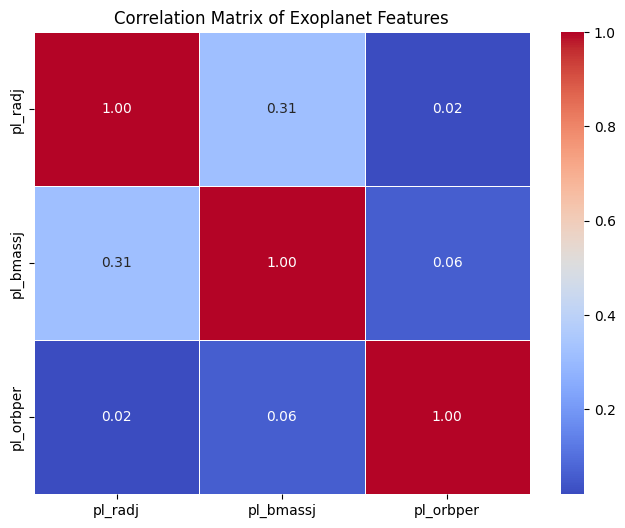

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'pl_radj', 'pl_bmassj', and 'pl_orbper' are columns for planet radius, mass, and orbital period
features = data[['pl_radj', 'pl_bmassj', 'pl_orbper']].dropna()
correlation_matrix = features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Exoplanet Features')
plt.show()


## Pearson Correlation Matrix Heatmap

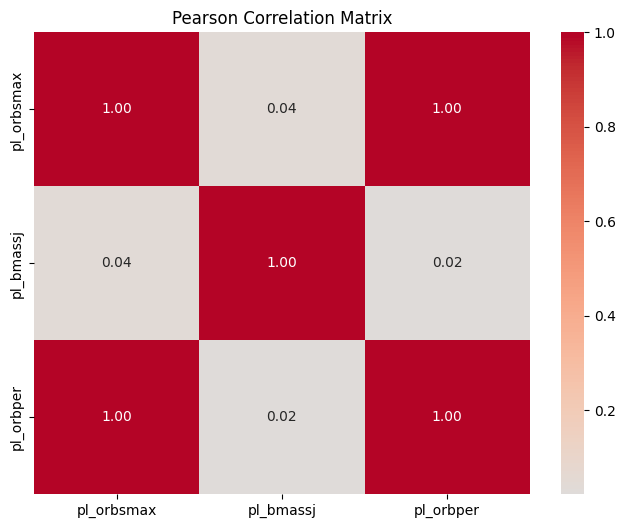

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical features for correlation
features = data_cleaned[['pl_orbsmax', 'pl_bmassj', 'pl_orbper']].dropna()  # assuming these are the names for orbital radius, planet mass, and orbital period

# Compute the Pearson correlation matrix
correlation_matrix = features.corr(method='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()


# Hypothesis Testing

In [63]:
import scipy.stats as stats

# Example hypothesis: Planets detected by radial velocity are larger than those detected by other methods
rv_masses = data_cleaned[data_cleaned['discoverymethod'] == 'Radial Velocity']['pl_bmassj']
other_masses = data_cleaned[data_cleaned['discoverymethod'] != 'Radial Velocity']['pl_bmassj']

# Perform an independent t-test
t_stat, p_val = stats.ttest_ind(rv_masses.dropna(), other_masses.dropna(), equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 5.321642971834715, P-value: 1.1422121525227802e-07


The results from your independent t-test provide compelling evidence regarding the hypothesis that planets detected by the radial velocity method are larger than those detected by other methods.

## Pair Plots


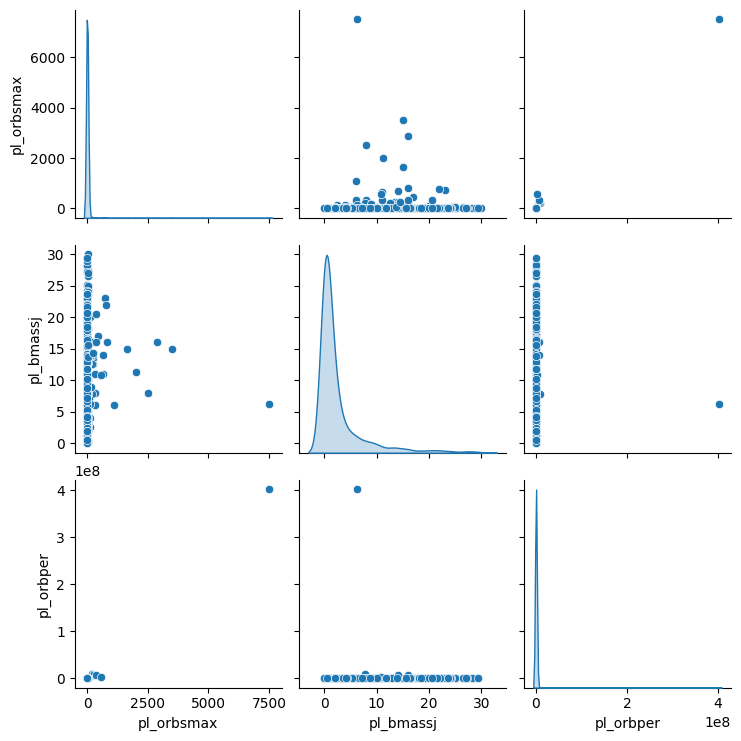

In [64]:
# Create pair plots to visualize relationships between multiple features
sns.pairplot(data_cleaned[['pl_orbsmax', 'pl_bmassj', 'pl_orbper']], diag_kind='kde')
plt.show()


## Trend Analysis Over Time


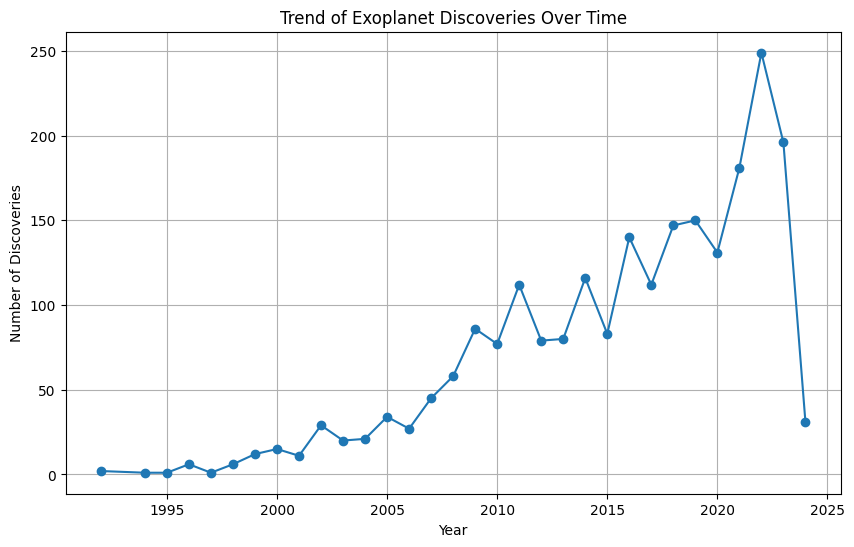

In [65]:
# Analyze trends in the number of planets discovered each year
discoveries_per_year = data_cleaned['disc_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(discoveries_per_year.index, discoveries_per_year, marker='o', linestyle='-')
plt.title('Trend of Exoplanet Discoveries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.grid(True)
plt.show()


## Effect of Major Missions


## Discovery and count occurrences

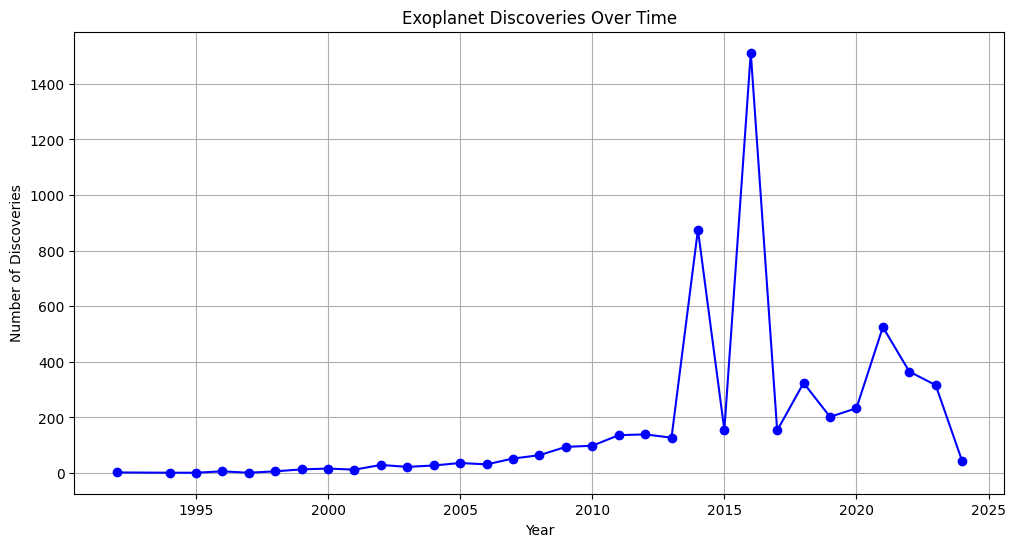

In [80]:
import matplotlib.pyplot as plt

# Group data by year of discovery and count occurrences
discoveries_per_year = data['disc_year'].value_counts().sort_index()

# Plotting the discoveries over time
plt.figure(figsize=(12, 6))
plt.plot(discoveries_per_year.index, discoveries_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Exoplanet Discoveries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.grid(True)
plt.show()


**The database also provide the year of discovery. Again with the help of google, try to correlate this with the lauch date of big satellites.**

# Impact of Space Missions on Exoplanet Discoveries

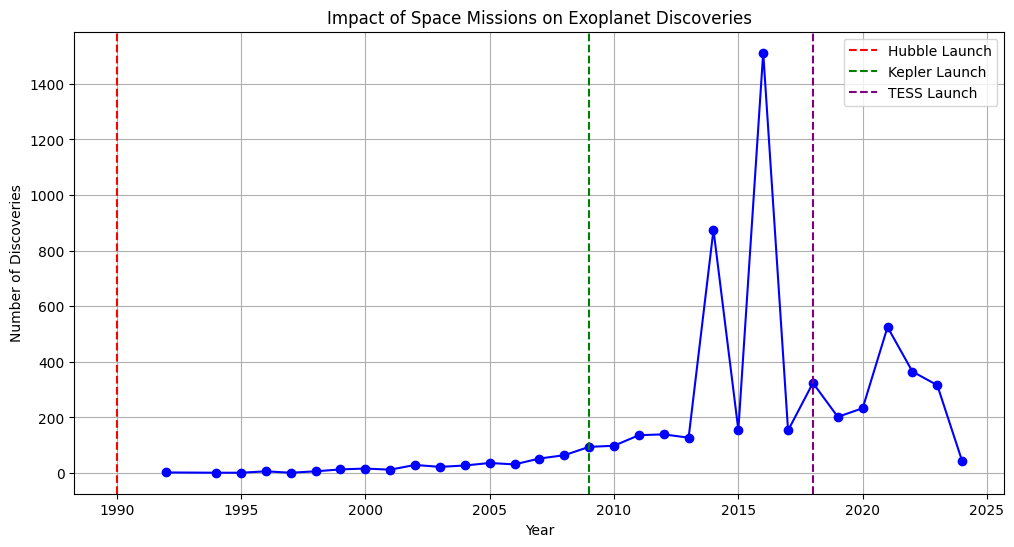

In [79]:
# Redefining the plot with mission overlays
plt.figure(figsize=(12, 6))
plt.plot(discoveries_per_year.index, discoveries_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Impact of Space Missions on Exoplanet Discoveries')
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.axvline(x=1990, color='r', linestyle='--', label='Hubble Launch')
plt.axvline(x=2009, color='g', linestyle='--', label='Kepler Launch')
plt.axvline(x=2018, color='purple', linestyle='--', label='TESS Launch')
plt.legend()
plt.grid(True)
plt.show()
